# Aircraft Predictive Maintenance

## 1. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_csv(r'/content/drive/MyDrive/Applied AI/Statistical Learning Methods/Assignment/Assignment data and codes/train_selected.csv', header=0)

In [ ]:
train_data.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,1,1400.60,554.36,47.47,521.66,191,0
1,1,2,1403.14,553.75,47.49,522.28,190,0
2,1,3,1404.20,554.26,47.27,522.42,189,0
3,1,4,1401.87,554.45,47.13,522.86,188,0
4,1,5,1406.22,554.00,47.28,522.19,187,0


In [ ]:
test_data = pd.read_csv(r'/content/drive/MyDrive/Applied AI/Statistical Learning Methods/Assignment/Assignment data and codes/test_selected_ttf.csv', header=0)

In [ ]:
test_data.head()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
0,1,31,1398.91,554.42,47.23,521.79,112,0
1,2,49,1410.83,553.52,47.67,521.74,98,0
2,3,126,1418.89,552.59,47.88,520.83,69,0
3,4,106,1406.88,552.64,47.65,521.88,82,0
4,5,98,1419.36,553.29,47.46,521.00,91,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   s1         20631 non-null  float64
 3   s2         20631 non-null  float64
 4   s3         20631 non-null  float64
 5   s4         20631 non-null  float64
 6   ttf        20631 non-null  int64  
 7   label_bnc  20631 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.3 MB


In [ ]:
train_data.describe()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,1408.933782,553.367711,47.541168,521.413470,107.807862,0.150259
std,29.227633,68.880990,9.000605,0.885092,0.267087,0.737553,68.880990,0.357334
min,1.000000,1.000000,1382.250000,549.850000,46.850000,518.690000,0.000000,0.000000
25%,26.000000,52.000000,1402.360000,552.810000,47.350000,520.960000,51.000000,0.000000
50%,52.000000,104.000000,1408.040000,553.440000,47.510000,521.480000,103.000000,0.000000
75%,77.000000,156.000000,1414.555000,554.010000,47.700000,521.950000,155.000000,0.000000
max,100.000000,362.000000,1441.490000,556.060000,48.530000,523.380000,361.000000,1.000000


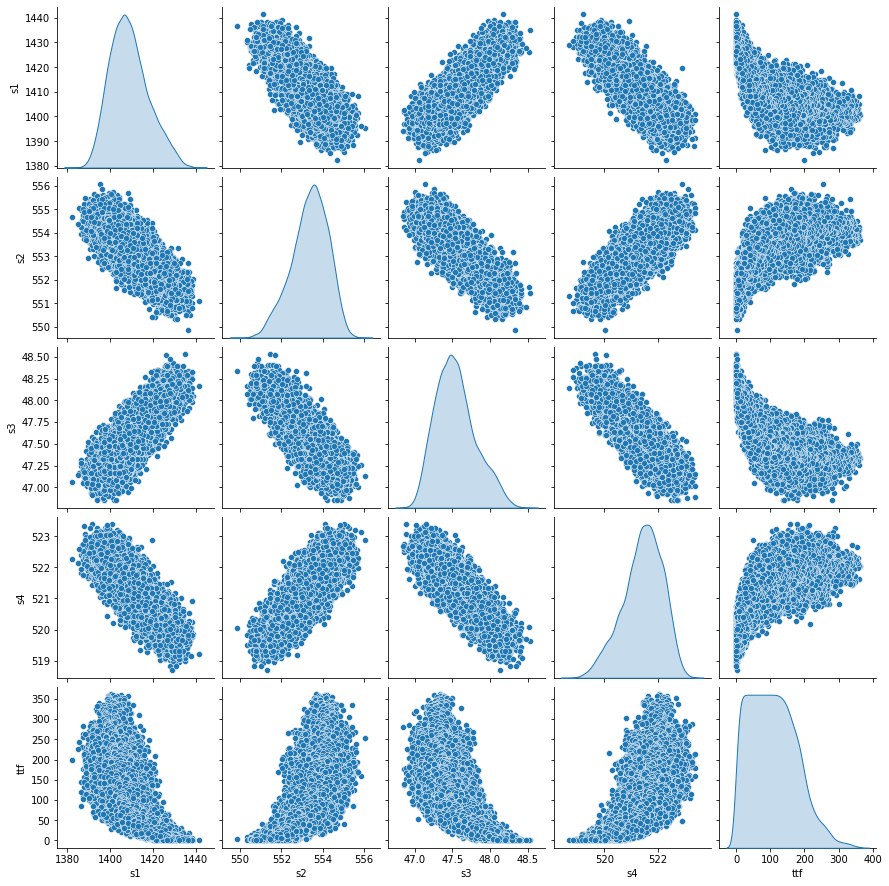

In [ ]:
sns.pairplot(train_data[['s1', 's2', 's3', 's4', 'ttf']],diag_kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.443194
Kurtosis: -0.163681


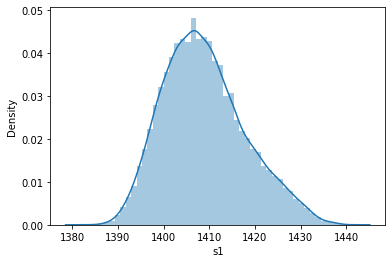

In [ ]:
sns.distplot(train_data['s1'])
print("Skewness: %f" % train_data['s1'].skew())
print("Kurtosis: %f" % train_data['s1'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.394329
Kurtosis: -0.157949


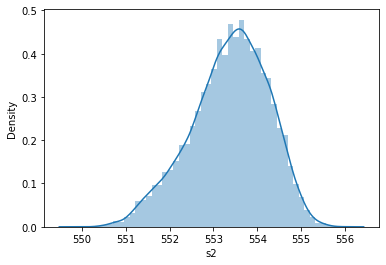

In [ ]:
sns.distplot(train_data['s2'])
print("Skewness: %f" % train_data['s2'].skew())
print("Kurtosis: %f" % train_data['s2'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.469329
Kurtosis: -0.172192


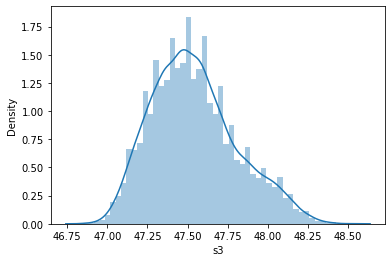

In [ ]:
sns.distplot(train_data['s3'])
print("Skewness: %f" % train_data['s3'].skew())
print("Kurtosis: %f" % train_data['s3'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.442407
Kurtosis: -0.144917


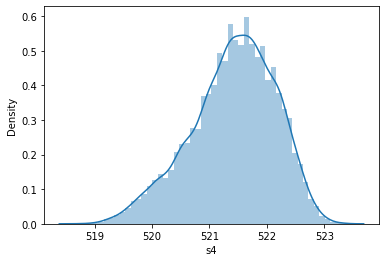

In [ ]:
sns.distplot(train_data['s4'])
print("Skewness: %f" % train_data['s4'].skew())
print("Kurtosis: %f" % train_data['s4'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.499904
Kurtosis: -0.218539


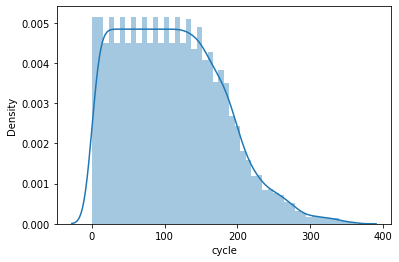

In [ ]:
sns.distplot(train_data['cycle'])
print("Skewness: %f" % train_data['cycle'].skew())
print("Kurtosis: %f" % train_data['cycle'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


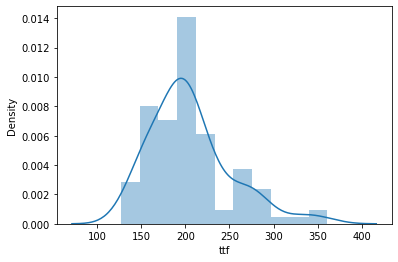

In [ ]:
sns.distplot(train_data.groupby('id')['ttf'].max())

In [ ]:
plt.xlabel = 'ttf'
plt.show()

In [ ]:
(train_data.groupby('id')['ttf'].max()).describe()

count    100.000000
mean     205.310000
std       46.342749
min      127.000000
25%      176.000000
50%      198.000000
75%      228.250000
max      361.000000
Name: ttf, dtype: float64

In [ ]:
[np.std(train_data['s1']), np.std(train_data['s2']), np.std(train_data['s3']), np.std(train_data['s4'])]

[9.000386644877754, 0.8850708068616244, 0.2670809255982643, 0.7375355171108272]

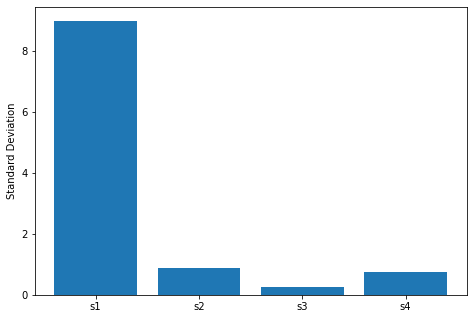

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['s1', 's2', 's3', 's4']
std_vars = [np.std(train_data['s1']), np.std(train_data['s2']), np.std(train_data['s3']), np.std(train_data['s4'])]
ax.bar(labels,std_vars)
ax.set_ylabel('Standard Deviation')
plt.show()

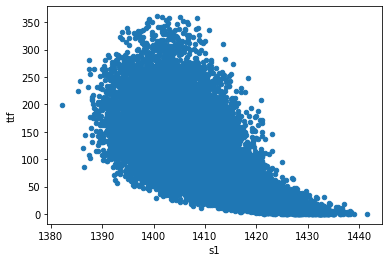

In [ ]:
train_data.plot.scatter(x='s1', y='ttf')

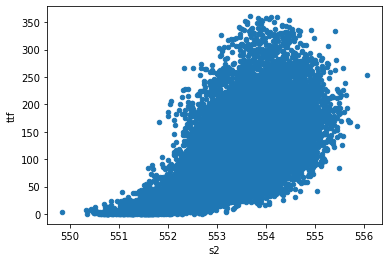

In [ ]:
train_data.plot.scatter(x='s2', y='ttf')

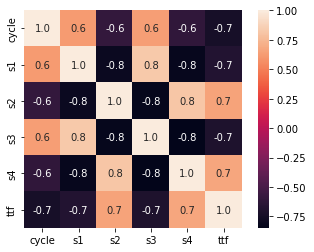

In [ ]:
sns.heatmap(train_data[['cycle','s1', 's2', 's3', 's4', 'ttf']].corr(), square=True, annot=True, fmt=".1f")

In [ ]:
b = train_data['label_bnc'].value_counts()
b

0    17531
1     3100
Name: label_bnc, dtype: int64

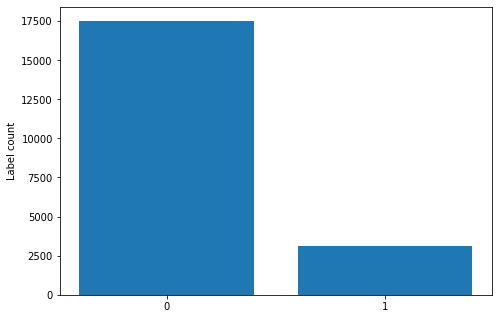

In [ ]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
labels = ['0', '1']
label_count = [b[0], b[1]]
ax.bar(labels,label_count)
ax.set_ylabel('Label count')
plt.show()

## 2. Regression

### 2.1. Feature Generation - Regression

In [ ]:
predictor = train_data[['cycle','s1','s2' ,'s3', 's4']]
predictor.head()

,cycle,s1,s2,s3,s4
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19


In [ ]:
target = train_data[['ttf']]
target.head()

,ttf
0,191
1,190
2,189
3,188
4,187


In [ ]:
X_test = test_data[['cycle','s1','s2' ,'s3', 's4']]
X_test.head()

,cycle,s1,s2,s3,s4
0,31,1398.91,554.42,47.23,521.79
1,49,1410.83,553.52,47.67,521.74
2,126,1418.89,552.59,47.88,520.83
3,106,1406.88,552.64,47.65,521.88
4,98,1419.36,553.29,47.46,521.00


In [ ]:
y_test = test_data[['ttf']]
y_test.head()

,ttf
0,112
1,98
2,69
3,82
4,91


### 2.2. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
kf = KFold(n_splits = 10, shuffle = True)
linreg = LinearRegression()

In [ ]:
result_cv_lr = cross_val_score(linreg , predictor, target, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_lr.mean()))
print("K fold accuracy: {}".format(result_cv_lr))

Avg accuracy: 0.6441989848053795
K fold accuracy: [0.6596742  0.63512317 0.62967646 0.63672319 0.66249345 0.62632513
 0.65807114 0.64482085 0.64133716 0.64774508]


In [ ]:
model_lr = linreg.fit(predictor, target)
y_test_pred = linreg.predict(X_test)

In [ ]:
actual_pred = np.concatenate([y_test, y_test_pred], axis = 1)
actual_pred_df = pd.DataFrame(actual_pred)

In [ ]:
actual_pred_df.columns = ['actual', 'predicted']

In [ ]:
actual_pred_df.head()

,actual,predicted
0,112.0,175.406406
1,98.0,131.392267
2,69.0,66.530523
3,82.0,105.518397
4,91.0,102.552732


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print("Test RMSE: {}".format(rmse))
print("Test R2: {}".format(model_lr.score(X_test, y_test)))
print("Train R2: {}".format(model_lr.score(predictor, target)))

Test RMSE: 32.36089673919739
Test R2: 0.3935687803149718
Train RMSE: 41.071267423170944
Train R2: 0.6444517888095274


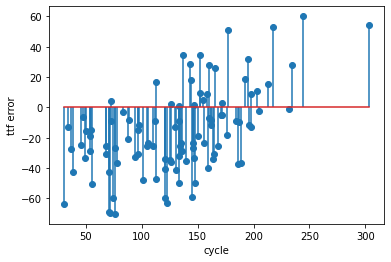

In [ ]:
x = X_test['cycle'].values
y = (y_test - y_test_pred).values
plt.stem(x, y, use_line_collection=True)
plt.xlabel('cycle')
plt.ylabel('ttf error')
plt.show()

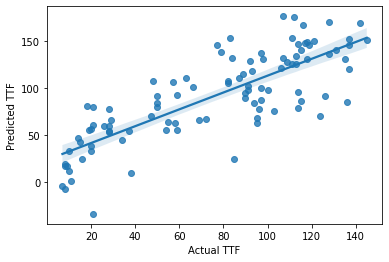

In [ ]:
sns.regplot(x="actual", y='predicted', data=(actual_pred_df))
plt.xlabel('Actual TTF')
plt.ylabel('Predicted TTF')
plt.show()

### 2.3. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree=2)

predictor_poly = poly_reg.fit_transform(predictor)

lin_reg2 = LinearRegression()
model_polyreg = lin_reg2.fit(predictor_poly,target)

In [ ]:
result_cv_polyref = cross_val_score(lin_reg2, poly_reg.fit_transform(predictor), target, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_lr.mean()))
print("K fold accuracy: {}".format(result_cv_lr))

Avg accuracy: 0.6438443916160479
K fold accuracy: [0.64540059 0.64783143 0.64801853 0.63004309 0.64083219 0.64200318
 0.6267892  0.65597103 0.64642096 0.65513371]


In [ ]:
y_test_pred_polyreg = model_polyreg.predict(poly_reg.transform(X_test))

In [ ]:
actual_pred_polyreg = np.concatenate([y_test, y_test_pred_polyreg], axis = 1)
actual_pred_polyreg_df = pd.DataFrame(actual_pred_polyreg)

In [ ]:
actual_pred_polyreg_df.columns = ['actual', 'predicted']

In [ ]:
actual_pred_polyreg_df.head()

,actual,predicted
0,112.0,181.148680
1,98.0,138.563908
2,69.0,54.642062
3,82.0,88.993535
4,91.0,89.254707


In [ ]:
mse_polyreg = mean_squared_error(y_test, y_test_pred_polyreg)
rmse_polyreg = np.sqrt(mse_polyreg)
print("Test RMSE: {}".format(rmse_polyreg))
print("Test R2: {}".format(model_polyreg.score(poly_reg.transform(X_test), y_test)))
print("Train R2: {}".format(model_polyreg.score(poly_reg.transform(predictor), target)))

Test RMSE: 28.11001553751958
Test R2: 0.5424246431116788
Train R2: 0.6996255299056571


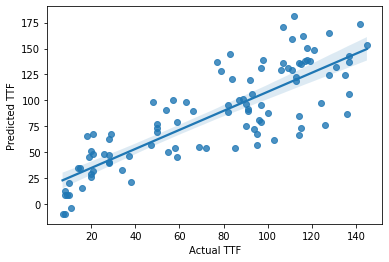

In [ ]:
sns.regplot(x="actual", y='predicted', data=(actual_pred_polyreg_df))
plt.xlabel('Actual TTF')
plt.ylabel('Predicted TTF')
plt.show()

### 2.4. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtreg = DecisionTreeRegressor(max_depth=6)

In [ ]:
model_dtreg = dtreg.fit(predictor,target)

In [ ]:
result_cv_dtreg = cross_val_score(dtreg , predictor, target, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_dtreg.mean()))
print("K fold accuracy: {}".format(result_cv_dtreg))

Avg accuracy: 0.6836195116140186
K fold accuracy: [0.68897428 0.68086977 0.68425962 0.69441073 0.669527   0.68513866
 0.69662196 0.67284626 0.68037668 0.68317017]


In [ ]:
y_test_pred_dtreg = model_dtreg.predict(X_test)

In [ ]:
actual_pred_dtreg_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predicted': y_test_pred_dtreg})

In [ ]:
actual_pred_dtreg_df.columns = ['actual', 'predicted']

In [ ]:
actual_pred_dtreg_df.head()

,actual,predicted
0,112,182.407692
1,98,135.027778
2,69,34.085253
3,82,75.343860
4,91,84.938462


In [ ]:
mse_dtreg = mean_squared_error(y_test, y_test_pred_dtreg)
rmse_dtreg = np.sqrt(mse_dtreg)
print("Test RMSE: {}".format(rmse_dtreg))
print("Test R2: {}".format(model_dtreg.score(X_test, y_test)))
print("Train R2: {}".format(model_dtreg.score(predictor, target)))

Test RMSE: 28.864166402821745
Test R2: 0.5175431299909479
Train R2: 0.7024577234024747


In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
dtreg_gs = DecisionTreeRegressor()
# defining parameter range 
param_grid_dt = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}  
   
grid_dt = GridSearchCV(dtreg_gs, param_grid_dt, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_dt.fit(predictor, target) 
 
# print best parameter after tuning 
print(grid_dt.best_params_) 
grid_dt_predictions = grid_dt.predict(X_test) 

mse_grid_dt = mean_squared_error(y_test, grid_dt_predictions)
rmse_grid_dt = np.sqrt(mse_grid_dt)
print("Test RMSE: {}".format(rmse_grid_dt))
print("Test R2: {}".format(grid_dt.score(X_test, y_test)))
print("Train R2: {}".format(grid_dt.score(predictor, target)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 6}
Test RMSE: 28.864166402821745
Test R2: 0.5175431299909479
Train R2: 0.7024577234024747


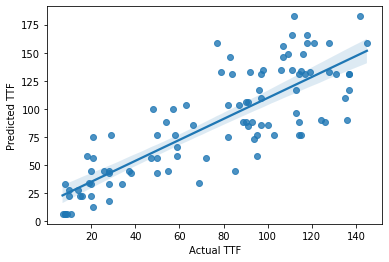

In [ ]:
sns.regplot(x="actual", y='predicted', data=(actual_pred_dtreg_df))
plt.xlabel('Actual TTF')
plt.ylabel('Predicted TTF')
plt.show()

### 2.5. Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfreg = RandomForestRegressor(max_depth = 6, max_features = 2, n_estimators = 80)

In [ ]:
model_rfreg = rfreg.fit(predictor,target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
result_cv_rfreg = cross_val_score(rfreg , predictor, target, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_rfreg.mean()))
print("K fold accuracy: {}".format(result_cv_rfreg))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

Avg accuracy: 0.6978189381947388
K fold accuracy: [0.69982327 0.72851675 0.67130861 0.70317818 0.70625874 0.68173531
 0.6891412  0.69693247 0.69769349 0.70360136]


In [ ]:
y_test_pred_rfreg = model_rfreg.predict(X_test)

In [ ]:
actual_pred_rfreg_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predicted': y_test_pred_rfreg})

In [ ]:
actual_pred_rfreg_df.columns = ['actual', 'predicted']

In [ ]:
actual_pred_rfreg_df.head()

,actual,predicted
0,112,183.919641
1,98,148.368338
2,69,35.157732
3,82,88.234166
4,91,83.323179


In [ ]:
mse_rfreg = mean_squared_error(y_test, y_test_pred_rfreg)
rmse_rfreg = np.sqrt(mse_rfreg)
print("Test RMSE: {}".format(rmse_rfreg))
print("Test R2: {}".format(model_rfreg.score(X_test, y_test)))
print("Train R2: {}".format(model_rfreg.score(predictor, target)))

Test RMSE: 27.504874144621635
Test R2: 0.5619135910948483
Train R2: 0.7097599745503587


In [ ]:
from sklearn.model_selection import GridSearchCV
rfreg_gs = RandomForestRegressor()
# defining parameter range 
param_grid_rf = {'max_features': [1,2,3],
                 'n_estimators': [30, 40, 50, 60, 70, 80],
                 'max_depth': [4, 5, 6, 7, 8]}  
   
grid_rf = GridSearchCV(rfreg_gs, param_grid_rf, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid_rf.fit(predictor, target) 
 
# print best parameter after tuning 
print(grid_rf.best_params_) 
grid_rf_predictions = grid_rf.predict(X_test) 

mse_grid_rf = mean_squared_error(y_test, grid_rf_predictions)
rmse_grid_rf = np.sqrt(mse_grid_rf)
print("Test RMSE: {}".format(rmse_grid_rf))
print("Test R2: {}".format(grid_rf.score(X_test, y_test)))
print("Train R2: {}".format(grid_rf.score(predictor, target)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: ignored

In [ ]:
def plot_features_weights(model, weights, feature_names, weights_type="c"):
 """Plot regression coefficients weights or feature importance.
 Args:
 model (str): The model name identifier
 weights (array): Contains the regression coefficients weights or feature importance
 feature_names (list): Contains the corresponding features names
 weights_type (str): 'c' for 'coefficients weights', otherwise is 'feature importance'
 Returns:
 plot of either regression coefficients weights or feature importance
 """
 (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
 W = pd.DataFrame({"Weights": weights}, feature_names)
 W.sort_values(by="Weights", ascending=True).plot(
 kind="barh", color="r", figsize=(px, py)
 )
 label = " Coefficients" if weights_type == "c" else " Features Importance"
 plt.xlabel(model + label)
 plt.gca().legend_ = None

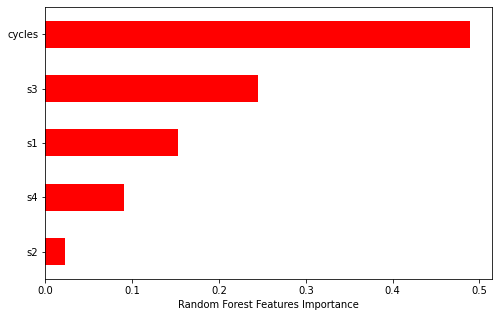

In [ ]:
plot_features_weights("Random Forest", model_rfreg.feature_importances_, ['cycles', 's1', 's2', 's3', 's4'], 'k')

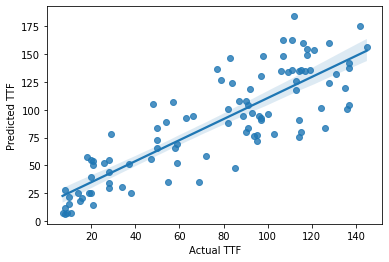

In [ ]:
sns.regplot(x="actual", y='predicted', data=(actual_pred_rfreg_df))
plt.xlabel('Actual TTF')
plt.ylabel('Predicted TTF')
plt.show()

## 3. Classification

### 3.1. Feature Generation - Classification

In [ ]:
predictor_cls = train_data[['cycle','s1','s2' ,'s3', 's4']]
predictor_cls.head()

,cycle,s1,s2,s3,s4
0,1,1400.60,554.36,47.47,521.66
1,2,1403.14,553.75,47.49,522.28
2,3,1404.20,554.26,47.27,522.42
3,4,1401.87,554.45,47.13,522.86
4,5,1406.22,554.00,47.28,522.19


In [ ]:
target_cls = train_data['label_bnc']

In [ ]:
X_test_cls = test_data[['cycle','s1','s2' ,'s3', 's4']]
X_test_cls.head()

,cycle,s1,s2,s3,s4
0,31,1398.91,554.42,47.23,521.79
1,49,1410.83,553.52,47.67,521.74
2,126,1418.89,552.59,47.88,520.83
3,106,1406.88,552.64,47.65,521.88
4,98,1419.36,553.29,47.46,521.00


In [ ]:
y_test_cls = test_data['label_bnc']

### 3.2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
logreg = LogisticRegression(C=10)

In [ ]:
model_lgreg = logreg.fit(predictor_cls, target_cls)

In [ ]:
result_cv_lgreg = cross_val_score(logreg , predictor_cls, target_cls, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_lgreg.mean()))
print("K fold accuracy: {}".format(result_cv_lgreg))

Avg accuracy: 0.9457127612004795
K fold accuracy: [0.94573643 0.94328648 0.94134755 0.94474067 0.95201163 0.94861852
 0.94328648 0.94571013 0.94134755 0.95104217]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_test_pred_cls = model_lgreg.predict(X_test_cls)
y_test_pred_cls.shape

(100,)

In [ ]:
actual_pred_cls_df = pd.DataFrame({'actual':y_test_cls, 'predicted': y_test_pred_cls})
actual_pred_cls_df.shape

(100, 2)

In [ ]:
actual_pred_cls_df[actual_pred_cls_df.actual != actual_pred_cls_df.predicted]

,actual,predicted
17,1,0
23,1,0
36,1,0
40,1,0
51,1,0
52,1,0
60,1,0
63,1,0
76,0,1
90,0,1


In [ ]:
accuracy_score(y_test_cls, y_test_pred_cls)

0.9

In [ ]:
confusion_matrix(y_test_cls, y_test_pred_cls)

array([[73,  2],
       [ 8, 17]])

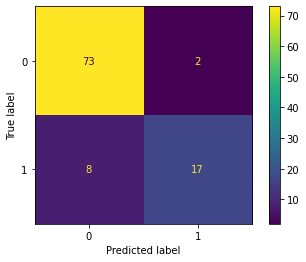

In [ ]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_cls, y_test_cls)

In [ ]:
# train metrics
print("Accuracy: {}".format(accuracy_score(target_cls, model_lgreg.predict(predictor_cls))),
"\nPrecision: {}".format(precision_score(target_cls, model_lgreg.predict(predictor_cls))),
"\nRecall: {}".format(recall_score(target_cls, model_lgreg.predict(predictor_cls))),
"\nF1: {}".format(f1_score(target_cls, model_lgreg.predict(predictor_cls))),
"\nROC AUC: {}".format(roc_auc_score(target_cls, logreg.predict_proba(predictor_cls)[:,1])))

Accuracy: 0.9458097038437303 
Precision: 0.8436199722607489 
Recall: 0.7848387096774193 
F1: 0.8131684491978609 
ROC AUC: 0.9795991248682057


In [ ]:
# test metrics
print("Accuracy: {}".format(accuracy_score(y_test_cls, y_test_pred_cls)),
"\nPrecision: {}".format(precision_score(y_test_cls, y_test_pred_cls)),
"\nRecall: {}".format(recall_score(y_test_cls, y_test_pred_cls)),
"\nF1: {}".format(f1_score(y_test_cls, y_test_pred_cls)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, logreg.predict_proba(X_test_cls)[:,1])))

Accuracy: 0.9 
Precision: 0.8947368421052632 
Recall: 0.68 
F1: 0.7727272727272727 
ROC AUC: 0.9600000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


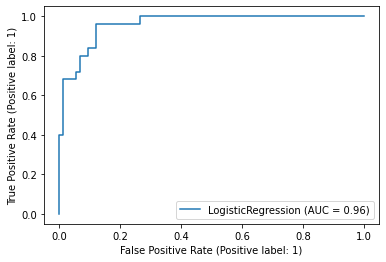

In [ ]:
plot_roc_curve(logreg, X_test_cls, y_test_cls)

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
logreg_gs = LogisticRegression()
# defining parameter range 
param_grid_logreg = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]} 
   
grid_logreg = GridSearchCV(logreg_gs, param_grid_logreg) 
   
# fitting the model for grid search 
grid_logreg.fit(predictor_cls, target_cls) 
 
# print best parameter after tuning 
print(grid_logreg.best_params_) 
grid_logreg_predictions = grid_logreg.predict(X_test_cls) 

print("Accuracy: {}".format(accuracy_score(y_test_cls, grid_logreg_predictions)),
"\nPrecision: {}".format(precision_score(y_test_cls, grid_logreg_predictions)),
"\nRecall: {}".format(recall_score(y_test_cls, grid_logreg_predictions)),
"\nF1: {}".format(f1_score(y_test_cls, grid_logreg_predictions)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, grid_logreg.predict_proba(X_test_cls)[:,1])))

{'C': 10}
Accuracy: 0.88 
Precision: 0.8095238095238095 
Recall: 0.68 
F1: 0.7391304347826089 
ROC AUC: 0.9642666666666666


### 3.3. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=4)

In [ ]:
model_dtc = dtc.fit(predictor_cls, target_cls)

In [ ]:
result_cv_dtc = cross_val_score(dtc , predictor_cls, target_cls, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_dtc.mean()))
print("K fold accuracy: {}".format(result_cv_dtc))

Avg accuracy: 0.9431920192239043
K fold accuracy: [0.94864341 0.9374697  0.94328648 0.94958798 0.93843917 0.94377121
 0.94231701 0.94813379 0.93843917 0.94183228]


In [ ]:
y_test_pred_dtc = model_dtc.predict(X_test_cls)

In [ ]:
actual_pred_dtc_df = pd.DataFrame({'actual':y_test_cls, 'predicted': y_test_pred_dtc})
actual_pred_dtc_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
accuracy_score(y_test_cls, y_test_pred_dtc)

0.89

In [ ]:
confusion_matrix(y_test_cls, y_test_pred_dtc)

array([[73,  2],
       [ 9, 16]])

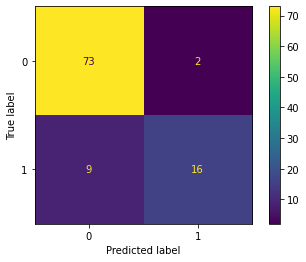

In [ ]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test_cls, y_test_cls)

In [ ]:
# train metrics
print("Accuracy: {}".format(accuracy_score(target_cls, model_dtc.predict(predictor_cls))),
"\nPrecision: {}".format(precision_score(target_cls, model_dtc.predict(predictor_cls))),
"\nRecall: {}".format(recall_score(target_cls, model_dtc.predict(predictor_cls))),
"\nF1: {}".format(f1_score(target_cls, model_dtc.predict(predictor_cls))),
"\nROC AUC: {}".format(roc_auc_score(target_cls, dtc.predict_proba(predictor_cls)[:,1])))

Accuracy: 0.945179584120983 
Precision: 0.8602268569337724 
Recall: 0.7583870967741936 
F1: 0.8061032058974799 
ROC AUC: 0.9746969331745976


In [ ]:
# test metrics
print("Accuracy: {}".format(accuracy_score(y_test_cls, y_test_pred_dtc)),
"\nPrecision: {}".format(precision_score(y_test_cls, y_test_pred_dtc)),
"\nRecall: {}".format(recall_score(y_test_cls, y_test_pred_dtc)),
"\nF1: {}".format(f1_score(y_test_cls, y_test_pred_dtc)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, dtc.predict_proba(X_test_cls)[:,1])))

Accuracy: 0.89 
Precision: 0.8888888888888888 
Recall: 0.64 
F1: 0.7441860465116279 
ROC AUC: 0.9458666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


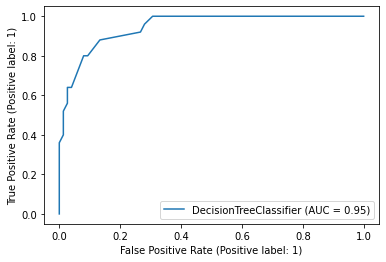

In [ ]:
plot_roc_curve(dtc, X_test_cls, y_test_cls)

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
dtc_gs = DecisionTreeClassifier()
# defining parameter range 
param_grid_dtc = {'max_depth': range(1,10)} 
   
grid_dtc = GridSearchCV(dtc_gs, param_grid_dtc) 
   
# fitting the model for grid search 
grid_dtc.fit(predictor_cls, target_cls) 
 
# print best parameter after tuning 
print(grid_dtc.best_params_) 
grid_dtc_predictions = grid_dtc.predict(X_test_cls) 

print("Accuracy: {}".format(accuracy_score(y_test_cls, grid_dtc_predictions)),
"\nPrecision: {}".format(precision_score(y_test_cls, grid_dtc_predictions)),
"\nRecall: {}".format(recall_score(y_test_cls, grid_dtc_predictions)),
"\nF1: {}".format(f1_score(y_test_cls, grid_dtc_predictions)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, grid_dtc.predict_proba(X_test_cls)[:,1])))

{'max_depth': 4}
Accuracy: 0.89 
Precision: 0.8888888888888888 
Recall: 0.64 
F1: 0.7441860465116279 
ROC AUC: 0.9458666666666666


### 3.4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth = 6, max_features = 3, n_estimators = 70)

In [ ]:
model_rfc = rfc.fit(predictor_cls, target_cls)

In [ ]:
result_cv_rfc = cross_val_score(rfc , predictor_cls, target_cls, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_rfc.mean()))
print("K fold accuracy: {}".format(result_cv_rfc))

Avg accuracy: 0.9469726859732382
K fold accuracy: [0.95348837 0.9389239  0.94716432 0.95007271 0.94571013 0.94813379
 0.93989336 0.95104217 0.9515269  0.94377121]


In [ ]:
y_test_pred_rfc = model_rfc.predict(X_test_cls)

In [ ]:
actual_pred_rfc_df = pd.DataFrame({'actual':y_test_cls, 'predicted': y_test_pred_rfc})
actual_pred_rfc_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
accuracy_score(y_test_cls, y_test_pred_rfc)

0.89

In [ ]:
confusion_matrix(y_test_cls, y_test_pred_rfc)

array([[73,  2],
       [ 9, 16]])

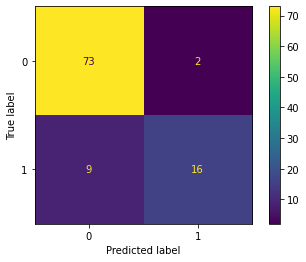

In [ ]:
ConfusionMatrixDisplay.from_estimator(rfc, X_test_cls, y_test_cls)

In [ ]:
# train metrics
print("Accuracy: {}".format(accuracy_score(target_cls, model_rfc.predict(predictor_cls))),
"\nPrecision: {}".format(precision_score(target_cls, model_rfc.predict(predictor_cls))),
"\nRecall: {}".format(recall_score(target_cls, model_rfc.predict(predictor_cls))),
"\nF1: {}".format(f1_score(target_cls, model_rfc.predict(predictor_cls))),
"\nROC AUC: {}".format(roc_auc_score(target_cls, rfc.predict_proba(predictor_cls)[:,1])))

Accuracy: 0.9534196112646018 
Precision: 0.8788522848034006 
Recall: 0.8003225806451613 
F1: 0.83775113962519 
ROC AUC: 0.9858405202949247


In [ ]:
# test metrics
print("Accuracy: {}".format(accuracy_score(y_test_cls, y_test_pred_rfc)),
"\nPrecision: {}".format(precision_score(y_test_cls, y_test_pred_rfc)),
"\nRecall: {}".format(recall_score(y_test_cls, y_test_pred_rfc)),
"\nF1: {}".format(f1_score(y_test_cls, y_test_pred_rfc)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, rfc.predict_proba(X_test_cls)[:,1])))

Accuracy: 0.9 
Precision: 0.8947368421052632 
Recall: 0.68 
F1: 0.7727272727272727 
ROC AUC: 0.9632


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


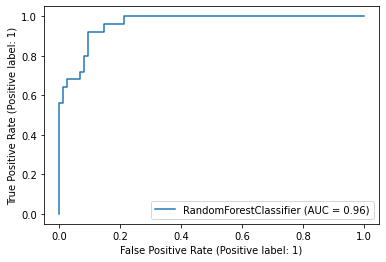

In [ ]:
plot_roc_curve(rfc, X_test_cls, y_test_cls)

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
rfc_gs = RandomForestClassifier()
# defining parameter range 
param_grid_rfc = {'max_features': range(1,4),
                 'n_estimators': [30, 40, 50, 60, 70, 80],
                 'max_depth': [4, 5, 6, 7, 8]} 
   
grid_rfc = GridSearchCV(rfc_gs, param_grid_rfc) 
   
# fitting the model for grid search 
grid_rfc.fit(predictor_cls, target_cls) 
 
# print best parameter after tuning 
print(grid_rfc.best_params_) 
grid_rfc_predictions = grid_rfc.predict(X_test_cls) 

print("Accuracy: {}".format(accuracy_score(y_test_cls, grid_rfc_predictions)),
"\nPrecision: {}".format(precision_score(y_test_cls, grid_rfc_predictions)),
"\nRecall: {}".format(recall_score(y_test_cls, grid_rfc_predictions)),
"\nF1: {}".format(f1_score(y_test_cls, grid_rfc_predictions)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, grid_rfc.predict_proba(X_test_cls)[:,1])))

{'max_depth': 6, 'max_features': 2, 'n_estimators': 50}
Accuracy: 0.9 
Precision: 0.8947368421052632 
Recall: 0.68 
F1: 0.7727272727272727 
ROC AUC: 0.9653333333333334


### 3.5. K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=9)

In [ ]:
model_knn = neigh.fit(predictor_cls, target_cls)

In [ ]:
result_cv_knn = cross_val_score(neigh , predictor_cls, target_cls, cv = kf)
 
print("Avg accuracy: {}".format(result_cv_knn.mean()))
print("K fold accuracy: {}".format(result_cv_knn))

Avg accuracy: 0.9357758231971953
K fold accuracy: [0.94476744 0.93504605 0.93698497 0.92922928 0.93213766 0.94571013
 0.93698497 0.93407659 0.92825982 0.93456132]


In [ ]:
y_test_pred_knn = neigh.predict(X_test_cls)

In [ ]:
actual_pred_knn_df = pd.DataFrame({'actual':y_test_cls, 'predicted': y_test_pred_knn})
actual_pred_knn_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
accuracy_score(y_test_cls, y_test_pred_knn)

0.86

In [ ]:
confusion_matrix(y_test_cls, y_test_pred_knn)

array([[73,  2],
       [12, 13]])

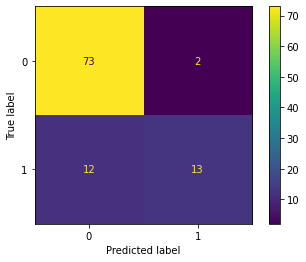

In [ ]:
ConfusionMatrixDisplay.from_estimator(neigh, X_test_cls, y_test_cls)

In [ ]:
print("Accuracy: {}".format(accuracy_score(target_cls, model_knn.predict(predictor_cls))),
"\nPrecision: {}".format(precision_score(target_cls, model_knn.predict(predictor_cls))),
"\nRecall: {}".format(recall_score(target_cls, model_knn.predict(predictor_cls))),
"\nF1: {}".format(f1_score(target_cls, model_knn.predict(predictor_cls))),
"\nROC AUC: {}".format(roc_auc_score(target_cls, neigh.predict_proba(predictor_cls)[:,1])))

Accuracy: 0.9457612330958267 
Precision: 0.8445217391304348 
Recall: 0.7832258064516129 
F1: 0.8127196652719665 
ROC AUC: 0.9828019121887311


In [ ]:
print("Accuracy: {}".format(accuracy_score(y_test_cls, y_test_pred_knn)),
"\nPrecision: {}".format(precision_score(y_test_cls, y_test_pred_knn)),
"\nRecall: {}".format(recall_score(y_test_cls, y_test_pred_knn)),
"\nF1: {}".format(f1_score(y_test_cls, y_test_pred_knn)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, neigh.predict_proba(X_test_cls)[:,1])))

Accuracy: 0.86 
Precision: 0.8666666666666667 
Recall: 0.52 
F1: 0.65 
ROC AUC: 0.9192


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


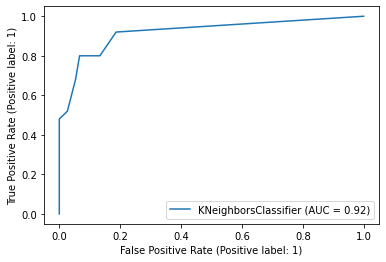

In [ ]:
plot_roc_curve(neigh, X_test_cls, y_test_cls)

In [ ]:
0.85

0.85

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
knn_gs = KNeighborsClassifier()
# defining parameter range 
param_grid_knn = {'n_neighbors': [3,5,7,9,11,13,15]} 
   
grid_knn = GridSearchCV(knn_gs, param_grid_knn) 
   
# fitting the model for grid search 
grid_knn.fit(predictor_cls, target_cls) 
 
# print best parameter after tuning 
print(grid_knn.best_params_) 
grid_knn_predictions = grid_knn.predict(X_test_cls) 

print("Accuracy: {}".format(accuracy_score(y_test_cls, grid_knn_predictions)),
"\nPrecision: {}".format(precision_score(y_test_cls, grid_knn_predictions)),
"\nRecall: {}".format(recall_score(y_test_cls, grid_knn_predictions)),
"\nF1: {}".format(f1_score(y_test_cls, grid_knn_predictions)),
"\nROC AUC: {}".format(roc_auc_score(y_test_cls, grid_knn.predict_proba(X_test_cls)[:,1])))

{'n_neighbors': 9}
Accuracy: 0.86 
Precision: 0.8666666666666667 
Recall: 0.52 
F1: 0.65 
ROC AUC: 0.9192
